In [2]:
# Import libraries
import pandas as pd
#import numpy as np  ∑
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# DATA INGESTION

# Fetch the data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [4]:
# Concatenate both training and test data
data = pd.concat([train_df,test_df]).reset_index(drop=True)

In [5]:
# Check the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
# Check the DataFrame
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Descriptive statistics 
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
# Checking the missing values
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

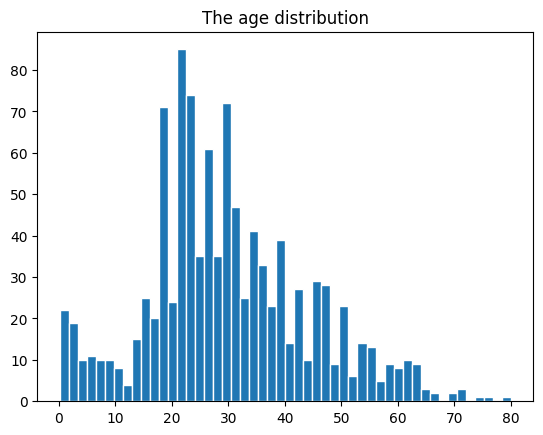

In [11]:
# Visualise age distribution
plt.hist(data=data, x='Age', bins=50, edgecolor='white')
plt.title ('The age distribution')
plt.show()

In [12]:
# Num per each value
data['Age'].value_counts()

Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64

In [13]:
# Age shown in descending order
data["Age"].value_counts().sort_values(ascending = False)

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
26.50     1
60.50     1
0.17      1
11.50     1
38.50     1
Name: count, Length: 98, dtype: int64

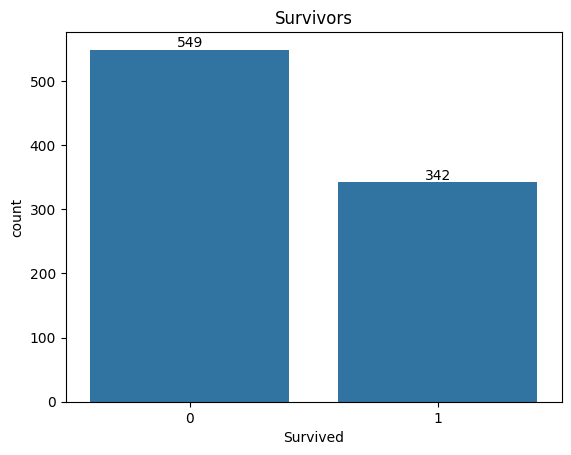

In [14]:
# How many survived in train set
axs=sns.countplot(data=train_df, x='Survived')
axs.bar_label(axs.containers[0])
plt.title('Survivors')
plt.show()

In [15]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

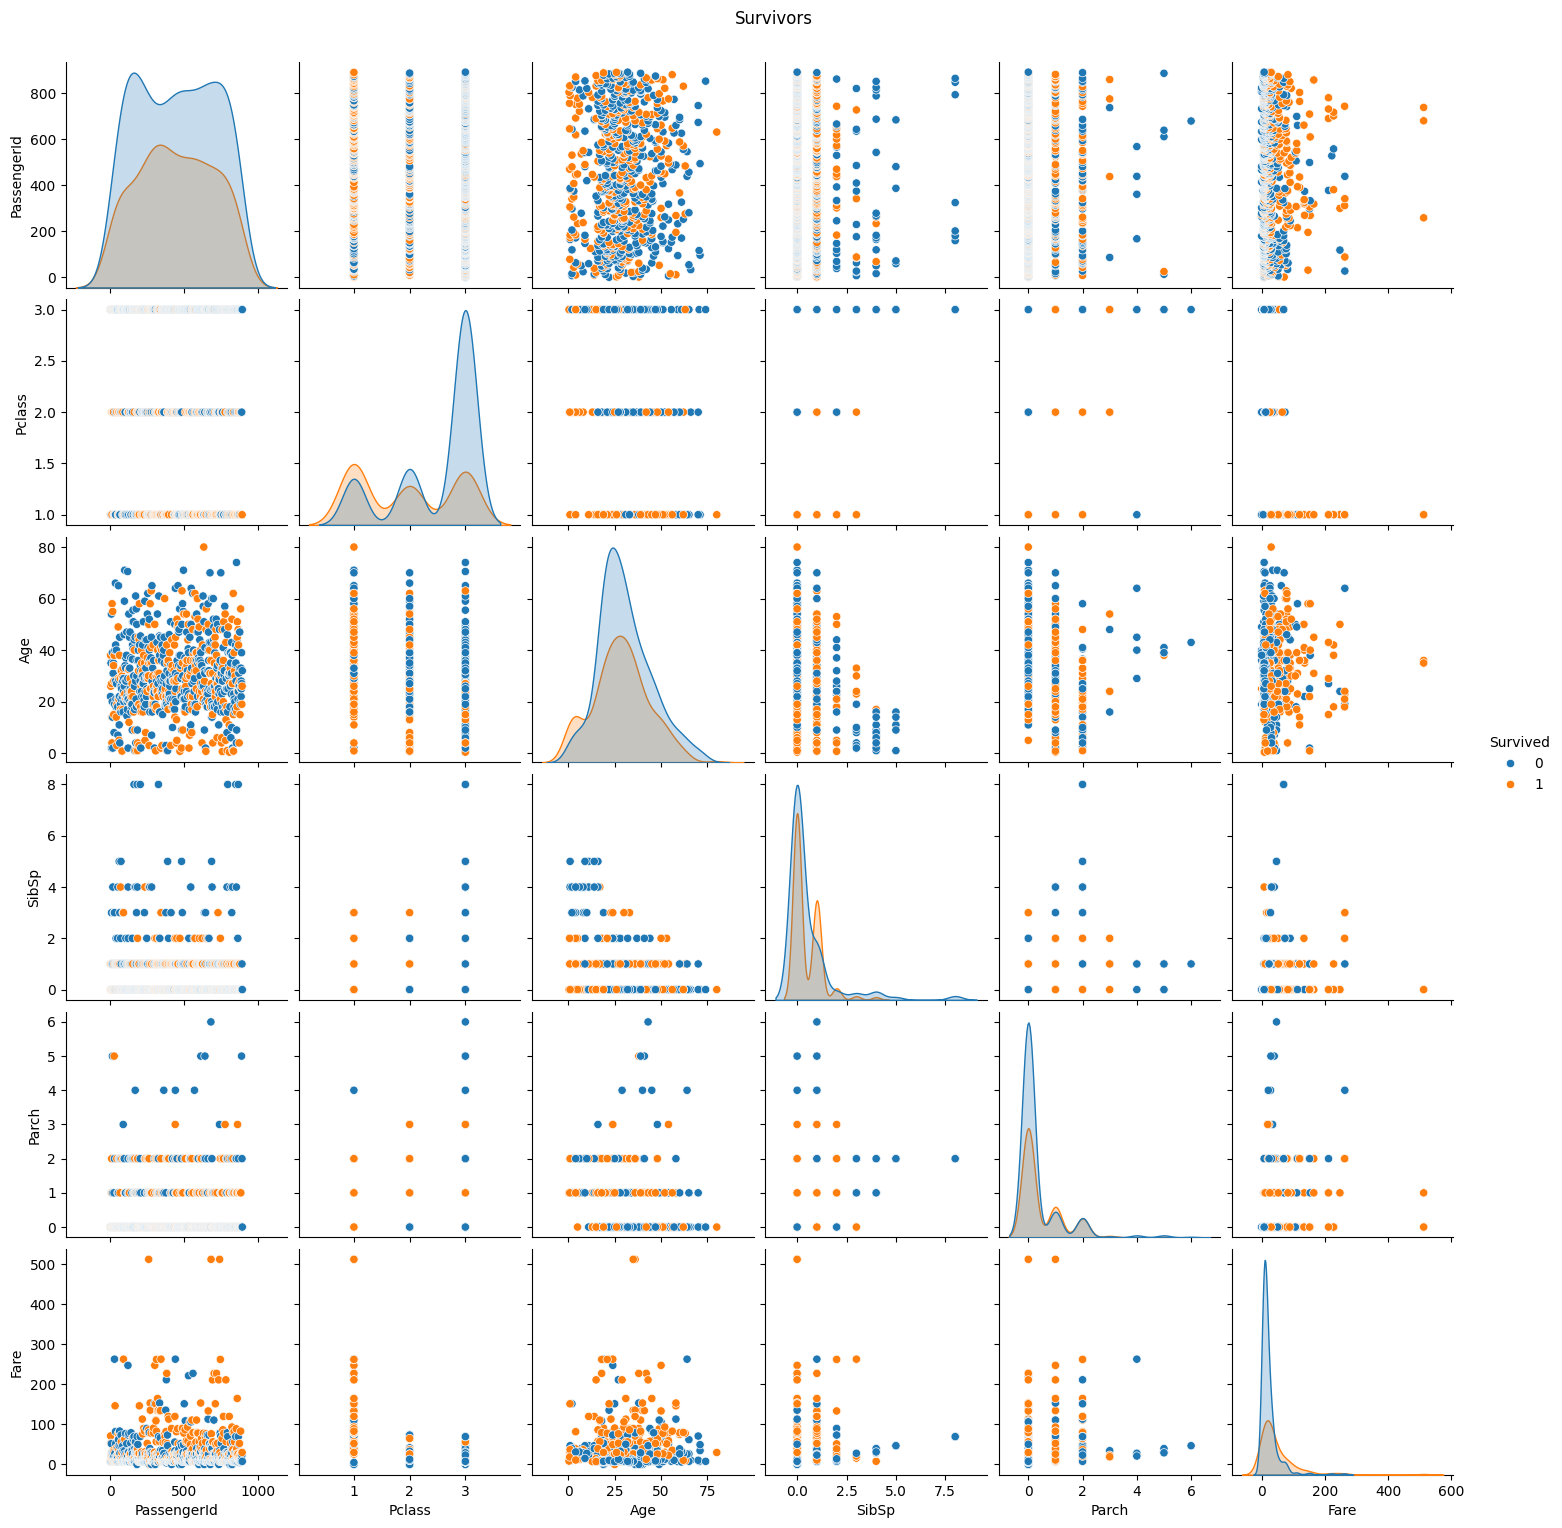

In [16]:
sns.pairplot(train_df, hue='Survived')
plt.suptitle('Survivors', y=1.02)
plt.show()

##### NOTE: 

- most survivors are from the 1st class
- most survivors are younger
- the higher the fare, the more survivors

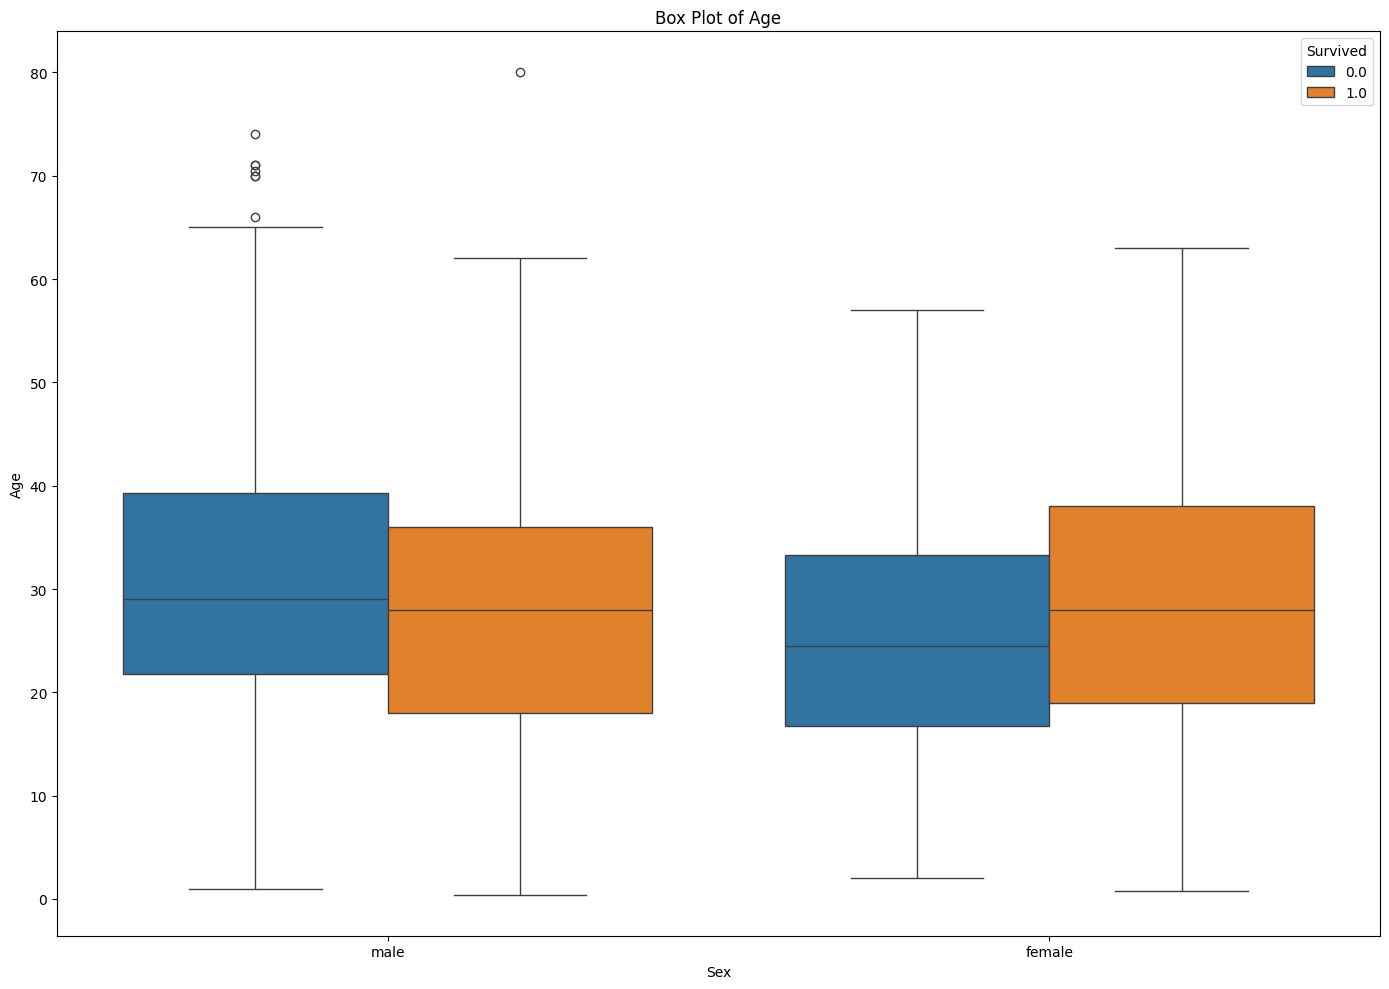

In [17]:
# Visualise Age-Sex distribution
plt.figure(figsize=(14, 10))
sns.boxplot(x='Sex', y='Age', data=data, hue='Survived')
plt.title(f'Box Plot of {'Age'}')
plt.tight_layout()
plt.show()

##### NOTE: 
- older women and younger men died
- outliers present only for male value


<Axes: xlabel='Age', ylabel='Survived'>

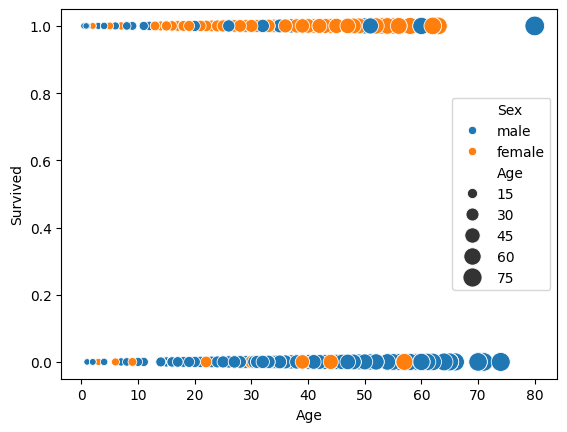

In [18]:
# Visualise it to study outliers more 
sns.scatterplot(data=data, x='Age', y='Survived', hue='Sex', size="Age", sizes=(20, 200))

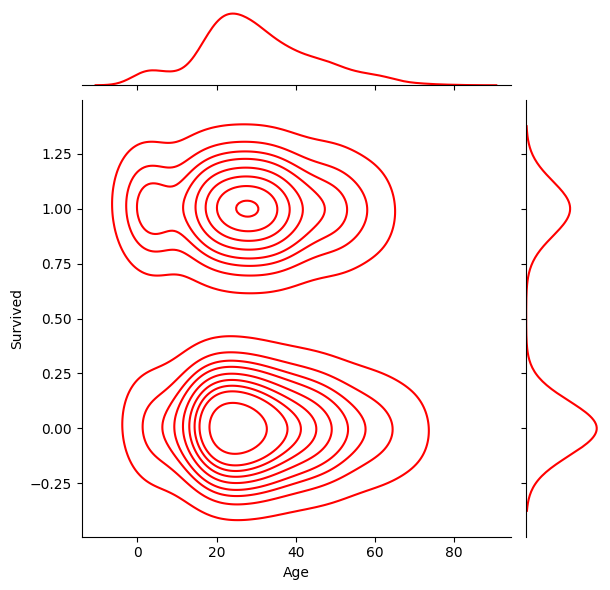

In [19]:
sns.jointplot(data=data, x='Age', y='Survived', kind='kde', color='red')

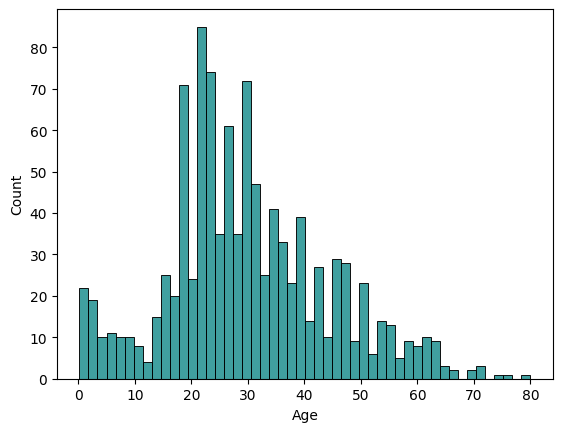

In [20]:
sns.histplot(data=data['Age'], bins=50, color='teal', stat='count')
plt.show()

##### NOTE: data is skewed to the right. Mean will introduce bias (influenced by outliers - older age), we will use median (is not sensitive to outliers, represents the central tendency).

In [21]:
# Show the older female to reduce outliers for men
print(train_df[train_df['Sex'] == 'female']['Age'].max())

63.0


#### NOTE: we take into accocunt age-survivor relationship in a train set only

In [22]:
# Show the older female to reduce outliers for men
print(data[data['Sex'] == 'male']['Age'].max())

80.0


In [23]:
# Max number of siblings and spouses
print(train_df['SibSp'].max())

8


In [24]:
# Max num of paernts & children
print(train_df['Parch'].max())

6


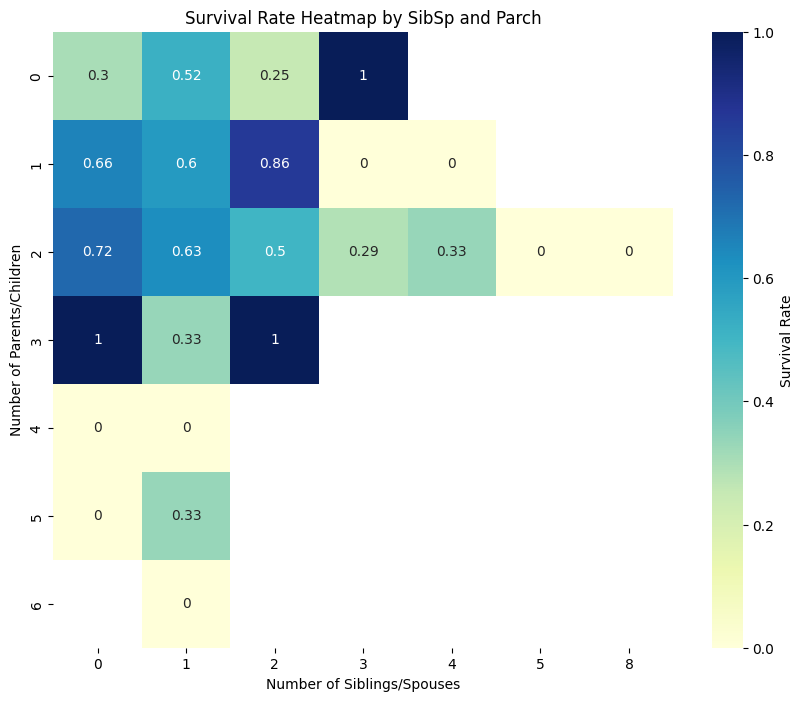

In [25]:

# Create a pivot table for the heatmap
pivot_table = train_df.pivot_table(values='Survived', index='Parch', columns='SibSp', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate Heatmap by SibSp and Parch')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Number of Parents/Children')
plt.show()

#### Note: 
High Survival Rates:

    Passengers with 2 parents/children and 1 sibling/spouse had a survival rate of 0.86, which is the highest in the heatmap. This indicates that most of these passengers survived.
    Passengers with 3 parents/children and 0 siblings/spouses also had a high survival rate of 1.0, meaning all of these passengers survived.

Moderate Survival Rates:

    Passengers with 1 parent/child and 0 siblings/spouses had a survival rate of 0.66. This shows a good chance of survival for this group as well.
    For 2 siblings/spouses and 1 parent/child, the survival rate was 0.72, indicating a relatively high chance of survival.

Low Survival Rates:

    Passengers with 1 parent/child and 3 siblings/spouses had a survival rate of 0.29, indicating that survival decreased with a larger number of siblings/spouses when also having a parent/child.
    Passengers with 4 or more parents/children had 0 survival, indicating none survived in those groups.

Zero Survival Rates:

    Groups with very high counts in either SibSp or Parch (like 5 SibSp or 6 Parch) show 0 survivors, suggesting that these combinations may not have had sufficient numbers of passengers to yield any survivors.

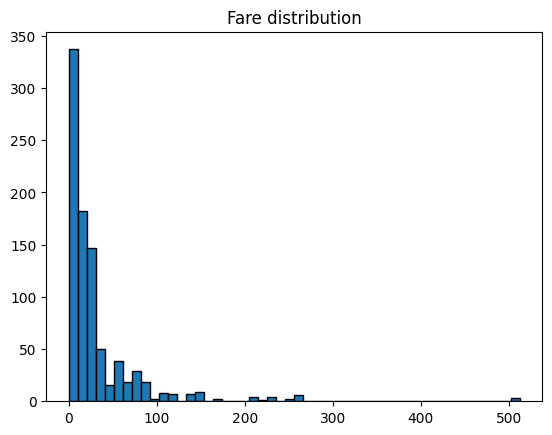

In [26]:
plt.hist(x='Fare', data=train_df, bins=50, edgecolor='black')
plt.title('Fare distribution')
plt.show()

In [27]:
# Entry for the max fare
train_df.iloc[train_df['Fare'].argmax()]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

In [28]:
# Entry for the min fare
train_df.iloc[train_df['Fare'].argmin()]

PassengerId                    180
Survived                         0
Pclass                           3
Name           Leonard, Mr. Lionel
Sex                           male
Age                           36.0
SibSp                            0
Parch                            0
Ticket                        LINE
Fare                           0.0
Cabin                          NaN
Embarked                         S
Name: 179, dtype: object

In [29]:
# Fare shown in descending order
train_df["Fare"].value_counts().sort_values(ascending = False)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
32.3208     1
8.3625      1
8.4333      1
25.5875     1
10.5167     1
Name: count, Length: 248, dtype: int64

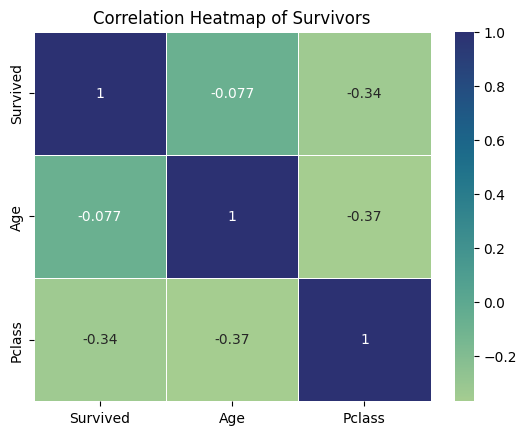

In [30]:
df_corr= train_df[['Survived', 'Age', 'Pclass']]
corr = df_corr.corr()
#plt.figure(figsize=(10, 4))
#cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, annot=True, linewidth=.5, cmap='crest') #cbar=True, #vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Survivors')
plt.show()

Note:

- Survived vs Pclass: moderate -ve corr. Passengers in higher class were more likely to survive

- Age vs Pclass: moderate -ve corr, younger passengers tended to be in higher classes

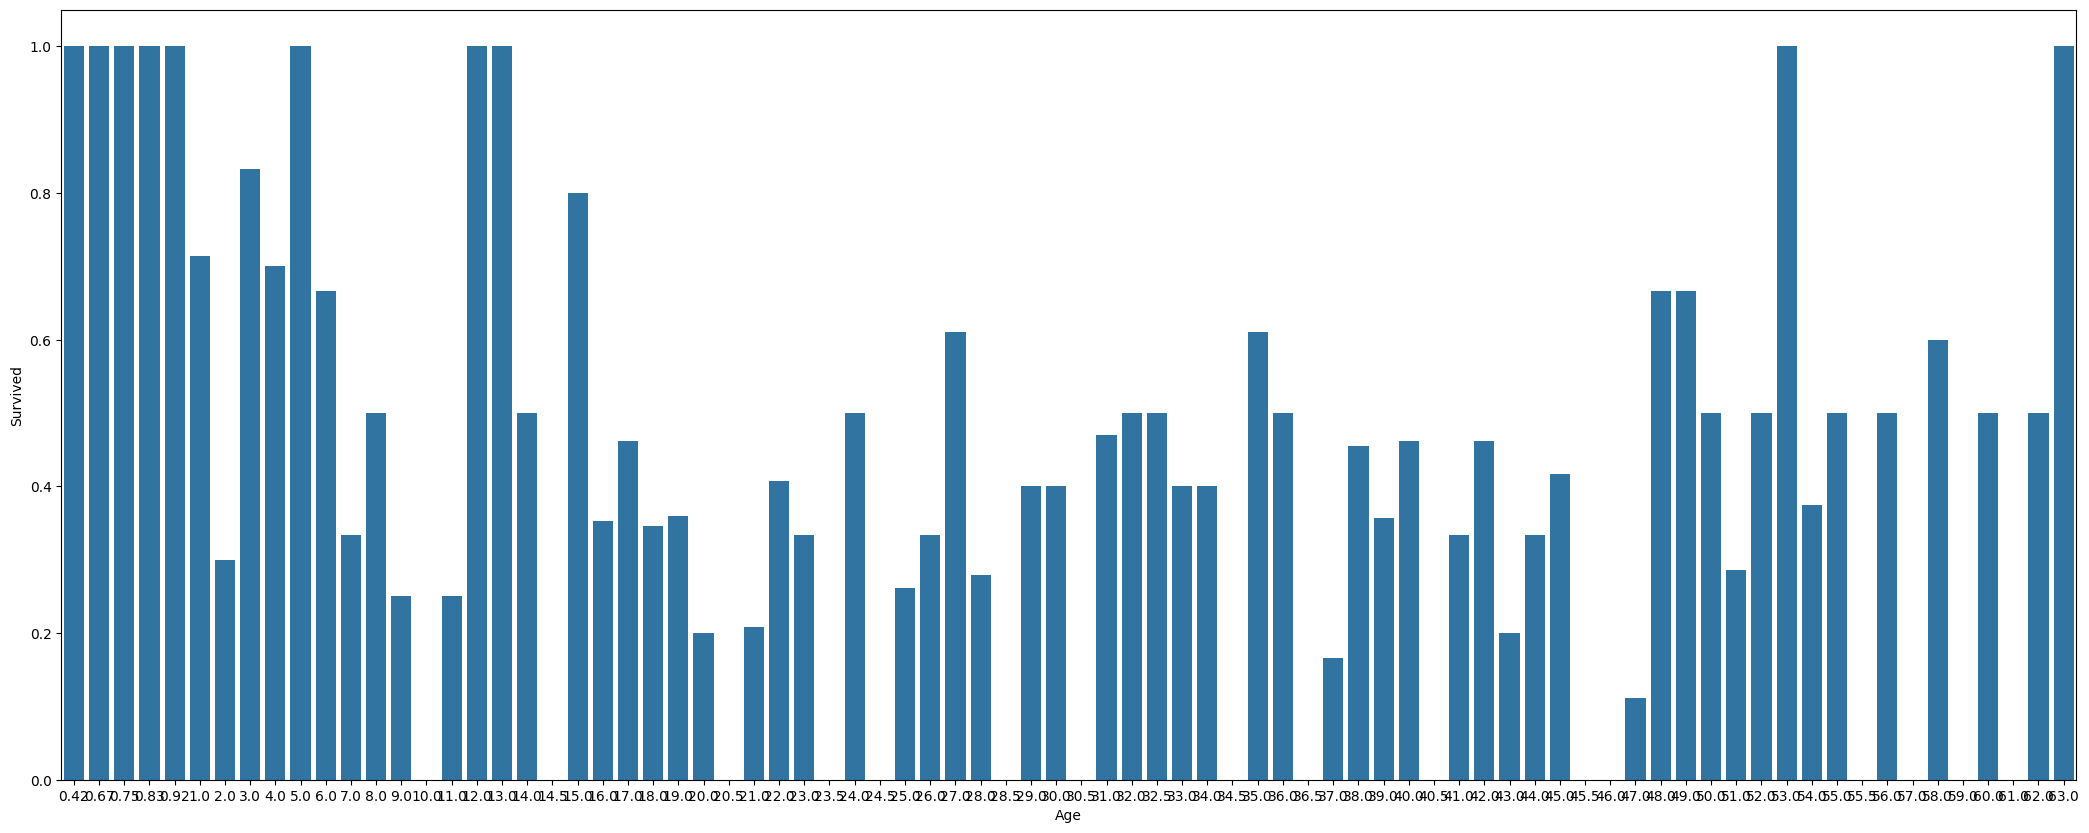

In [46]:
plt.figure(figsize=(26,10))
avg_survivors=train_df[['Age','Survived']].groupby(['Age'], as_index=False).mean()
avg_age=sns.barplot(data=avg_survivors, x='Age', y='Survived')
plt.show()

#### NOTE: 
- Infants and very young children (0–3 years): Have a very high survival rate (close to 1.0).
- Ages 5-10: Survival rates fluctuate but are still relatively high.
- Ages 20–40: The survival rates vary significantly. Some ages have high survival rates (closer to 1.0), while others show much lower survival rates.
- Older adults (50 and older): Show more fluctuation, with some older passengers having a good survival rate while others have much lower rates.

In [32]:
data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [33]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


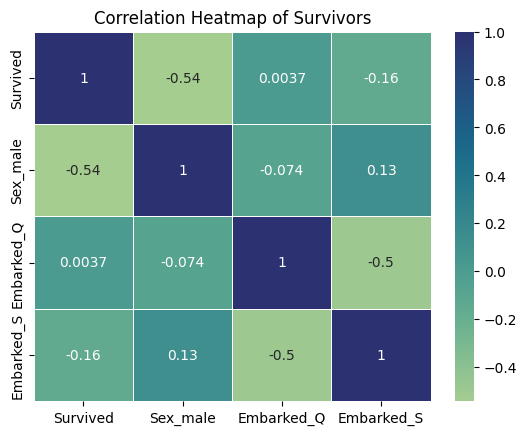

In [34]:
df_corr = pd.get_dummies(train_df[['Sex', 'Embarked', 'Survived']], drop_first=True)
corr = df_corr.corr()
#plt.figure(figsize=(10, 4))
#cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, annot=True, linewidth=.5, cmap='crest') #cbar=True, #vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Survivors')
plt.show()

#### NOTE:
- males were much less likely to survive than females
- passengers who embarked at Southampton were slightly less likely to survive

## Data Processing

#### Handling outliers

In [35]:
# Imputation with median
from sklearn.impute import SimpleImputer # using SimpleImputer from scikit-learn
# Impute missing values in the entire 'Age' column using median
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
# Handle the male outliers (> 63 years) by filling them with the median age
train_df.loc[(train_df['Sex'] == 'male') & (train_df['Age'] > 63), 'Age'] = train_df['Age'].median()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Fill in missing value Age with average
#train_df['Age']=train_df['Age'].fillna(train_df['Age'].median()).infer_objects(copy=False)

# Winsorizing 
#from scipy.stats import mstats
# Cap the ages of male passengers over 63 to a specific value, for example, 63 to limit extreme values
#train_df['Age']=train_df.loc[(train_df['Sex'] == 'male') & (train_df['Age'] > 63), 'Age'] = 63
#train_df.head()

In [37]:
# Remove outliers
#train_df.drop(train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1) & (train_df['Age'] > 63)].index)

In [38]:
# Delete Cabin column
train_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [39]:
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,28.0,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [40]:
# Check again for missing values
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [41]:
# Fill missing values with the most frequent value (mode)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object